# RICE LEAF DISEASE DETECTION

**AVULA BHUMIKA**

Task 2: Model Development to classify disease

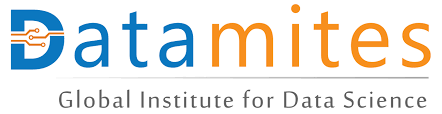

### Load Dependencies

In [3]:
!pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
    --------------------------------------- 5.5/376.0 MB 25.7 MB/s eta 0:00:15
   - -------------------------------------- 10.5/376.0 MB 25.1 MB/s eta 0:00:15
   - -------------------------------------- 14.7/376.0 MB 24.3 MB/s eta 0:00:15
   -- ------------------------------------- 19.9/376.0 MB 23.3 MB/s eta 0:00:16
   -- ------------------------------------- 25.2/376.0 MB 23.4 MB/s eta 0:00:15
   --- ------------------------------------ 30.4/376.0 MB 23.5 MB/s eta 0:00:15
   --- ------------------------------------ 35.7/376.0 MB 23.6 MB/s eta 0:00:15
   ---- ----------------------------------- 40.4/376.0 MB 23.5 MB/s eta 0:00:15
   ---- ----------------------------------- 45.9/376.0 MB 23.7 MB/s eta 0:00:14
   ----- ---------------------------------- 50.9/376.0 MB 23.6 MB/s eta 0:00:14
   ----- ---------------------------------- 56.1/376.0 MB 23.7 MB/s eta 0:00:14
   ------ --------------------------------- 61.3/3

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from warnings import filterwarnings
filterwarnings('ignore')

### Data Processing

In [26]:
data_path = r"C:\Users\Bhumi\Downloads\Capstone_D\Rice Leaf Disease Detection\Data"  
classes = sorted([d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d)) and not d.startswith('.')])
print("Filtered classes:", classes)



Filtered classes: ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [28]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16
SEED = 42

base_path = "."
train_dir = base_path  

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
train_gen = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    classes=classes, 
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    classes=classes,  
    subset='validation',
    shuffle=False
)
class_names = list(train_gen.class_indices.keys())


Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


### CNN Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(), 
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    'best_model.keras',           
    monitor='val_accuracy',  
    save_best_only=True,      
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',   
    patience=5,            
    restore_best_weights=True,
    verbose=1
)

In [39]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3632 - loss: 1.3014
Epoch 1: val_accuracy improved from -inf to 0.34783, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.3634 - loss: 1.2929 - val_accuracy: 0.3478 - val_loss: 1.0650
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3965 - loss: 1.2972
Epoch 2: val_accuracy did not improve from 0.34783
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3964 - loss: 1.2953 - val_accuracy: 0.3478 - val_loss: 1.0324
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2007 - loss: 1.3953
Epoch 3: val_accuracy improved from 0.34783 to 0.73913, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.2048 - loss: 1.3823 - val_accuracy: 0.7391 - val_loss: 0.9636
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3424 - loss: 1.2041
Epoch 4: val_accuracy did not improve from 0.73913
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.3485 - lo

### Evaluation

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
                       precision    recall  f1-score   support

Bacterial leaf blight       1.00      0.75      0.86         8
           Brown spot       0.83      0.62      0.71         8
            Leaf smut       0.64      1.00      0.78         7

             accuracy                           0.78        23
            macro avg       0.82      0.79      0.78        23
         weighted avg       0.83      0.78      0.78        23



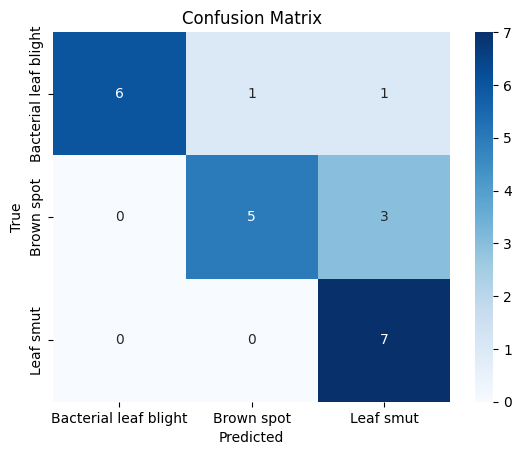

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

y_true = val_gen.classes
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_true, y_pred, target_names=val_gen.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen.class_indices.keys(), yticklabels=val_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### VGG Net

In [43]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False 

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)  

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3220 - loss: 1.2584
Epoch 1: val_accuracy improved from 0.82609 to 0.91304, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.3237 - loss: 1.2583 - val_accuracy: 0.9130 - val_loss: 1.0084
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2951 - loss: 1.2065
Epoch 2: val_accuracy improved from 0.91304 to 0.95652, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.2991 - loss: 1.2025 - val_accuracy: 0.9565 - val_loss: 0.9802
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3856 - loss: 1.0641
Epoch 3: val_accuracy did not improve from 0.95652
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.3841 - loss: 1.0656 - val_accuracy: 0.6522 - val_loss: 0.9639
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4158 - loss: 1.1151
Epoch 4: val_accuracy did not improve from 0.95652
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.4174 -

In [46]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3799 - loss: 1.0544
Epoch 1: val_accuracy did not improve from 0.95652
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.3866 - loss: 1.0521 - val_accuracy: 0.7391 - val_loss: 0.9822
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2948 - loss: 1.1506
Epoch 2: val_accuracy did not improve from 0.95652
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.2988 - loss: 1.1474 - val_accuracy: 0.8696 - val_loss: 0.9466
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4424 - loss: 1.0468
Epoch 3: val_accuracy did not improve from 0.95652
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.4491 - loss: 1.0435 - val_accuracy: 0.8261 - val_loss: 0.9224
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4285 - loss: 1.0193
Epoch 4: val_accuracy did not improve from 0.95652
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.4342 - loss: 1.0170 - val_accuracy: 0.7826 - val_loss: 0.9199
Epoch 5/20
6/6 ━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
                       precision    recall  f1-score   support

Bacterial leaf blight       1.00      1.00      1.00         8
           Brown spot       1.00      0.75      0.86         8
            Leaf smut       0.78      1.00      0.88         7

             accuracy                           0.91        23
            macro avg       0.93      0.92      0.91        23
         weighted avg       0.93      0.91      0.91        23



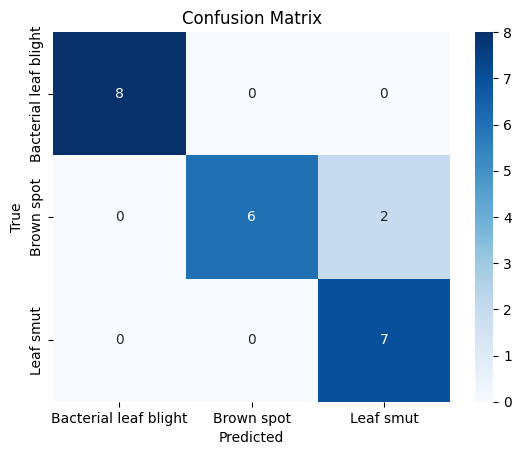

In [48]:
y_true = val_gen.classes
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_true, y_pred, target_names=val_gen.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen.class_indices.keys(), yticklabels=val_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
